# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: LOAD DATASET

In [ ]:
df = pd.read_csv("./Datasets/Boston_housing.csv")

In [109]:
df.shape

(506, 14)

# STEP 3: BASIC EDA

In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [112]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [113]:
# check missing values

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

       Missing Count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


In [114]:
# correlation with target

correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


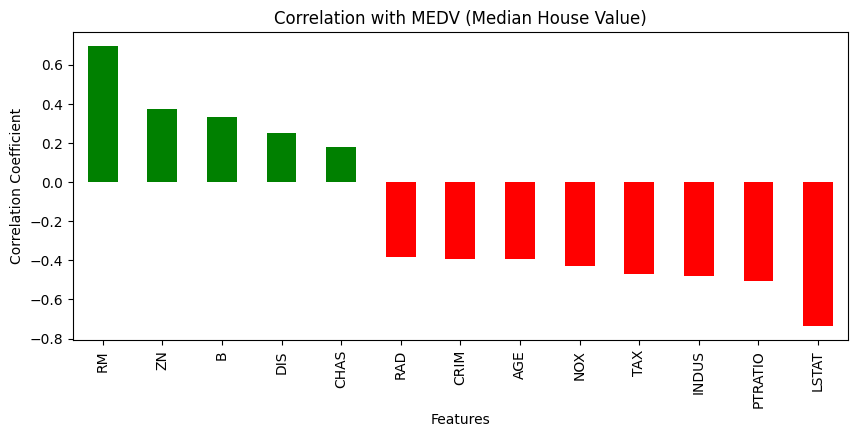

In [115]:
# Visualize correlation

plt.figure(figsize=(10,4))
correlation.drop('MEDV').plot(kind='bar', color=['green' if x > 0 else "red" for x in correlation.drop('MEDV')])

plt.title("Correlation with MEDV (Median House Value)")
plt.xlabel('Features')
plt.ylabel("Correlation Coefficient")

plt.show()

# STEP 4: OUTLIER DETECTION & HANDLING (CRITICAL FOR KNN!)

⚠️  
KNN is VERY sensitive to outliers!

Outliers affect distance calculations and pull predictions away

In [116]:
def detect_outliers_iqr(df, columns):
  "Detect Outliers using IQR Methods"

  outliers_info = []

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_count = len(outliers)

    outliers_percentage = (outliers_count / len(df)) * 100

    outliers_info.append({
        'Feature': col,
        'Outliers': outliers_count,
        'Percentage': f"{outliers_percentage:.4f}"
    })

  return pd.DataFrame(outliers_info)


def cap_outliers_iqr(df, columns):
  """Cap outliers at IQR boundaries"""

  df_capped = df.copy()

  for col in columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper= upper_bound)

  return df_capped

# Get numerical columns (exclude target)
feature_cols = df.drop(['MEDV'], axis=1).columns.tolist()

print("--- Outlier Detection Results (IQR Method) ---")
outliers_df = detect_outliers_iqr(df, feature_cols)
print(outliers_df)

--- Outlier Detection Results (IQR Method) ---
    Feature  Outliers Percentage
0      CRIM        65    12.8458
1        ZN        63    12.4506
2     INDUS         0     0.0000
3      CHAS        34     6.7194
4       NOX         0     0.0000
5        RM        30     5.9289
6       AGE         0     0.0000
7       DIS         5     0.9881
8       RAD         0     0.0000
9       TAX         0     0.0000
10  PTRATIO        15     2.9644
11        B        77    15.2174
12    LSTAT         7     1.3834


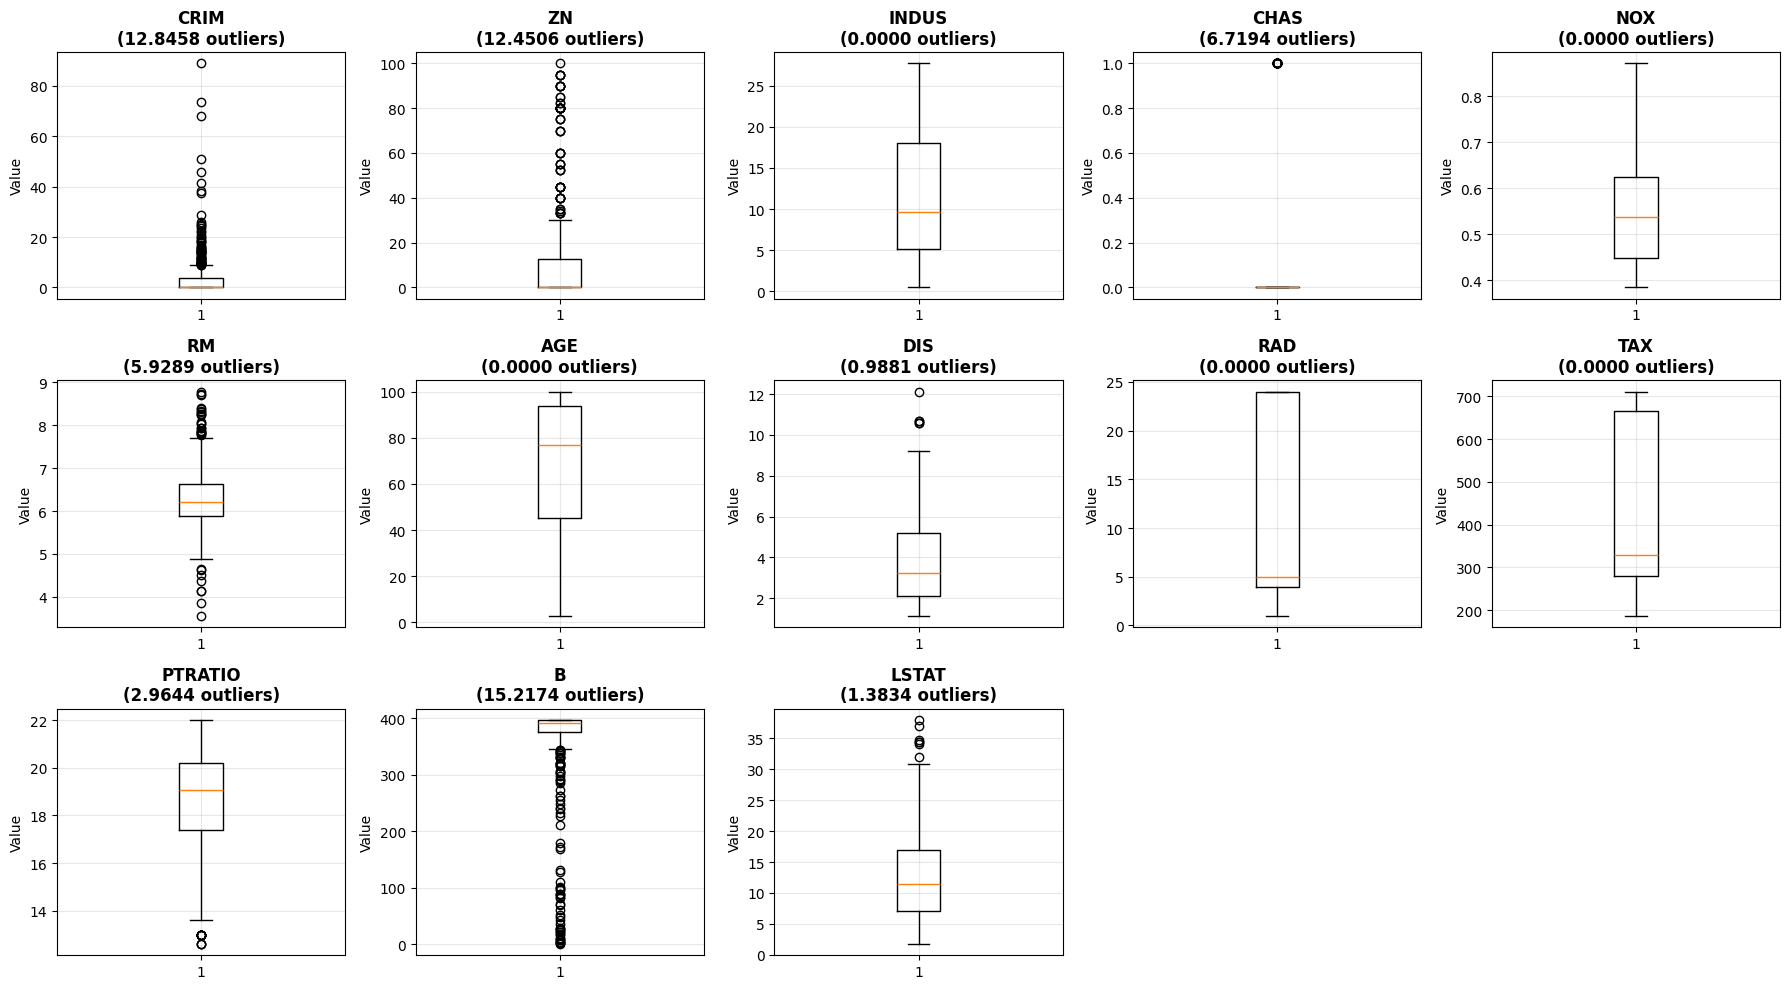

In [117]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].boxplot(df[col].dropna())
    outlier_pct = outliers_df[outliers_df["Feature"]==col]["Percentage"].values[0]
    axes[idx].set_title(f'{col}\n({outlier_pct} outliers)', fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [118]:
# Handle outliers
df_original = df.copy()  # Keep original for comparison
df = cap_outliers_iqr(df, feature_cols)

# STEP 5: DATA PREPROCESSING

In [119]:
# Fill missing values
print(f"Missing values before: {df.isnull().sum().sum()}")
df.fillna(df.median(numeric_only=True), inplace=True)
print(f"✓ Missing values after: {df.isnull().sum().sum()}")

Missing values before: 120
✓ Missing values after: 0


In [120]:
# Separate features and target
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [121]:
X.shape

(506, 13)

In [122]:
y.shape

(506,)

# STEP 6: TRAIN-TEST SPLIT

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size=0.2)


In [125]:
X_train.shape

(404, 13)

In [126]:
X_test.shape

(102, 13)

# STEP 7: FEATURE SCALING (MANDATORY FOR KNN!)

🔴 CRITICAL: KNN uses distance calculations

Without scaling, features with large ranges dominate!

In [127]:
print("\n--- Before Scaling (Sample) ---")
print(X_train.head())
print("\nFeature Ranges:")
print(f"RM (rooms): {X_train['RM'].min():.2f} to {X_train['RM'].max():.2f}")
print(f"LSTAT (%): {X_train['LSTAT'].min():.2f} to {X_train['LSTAT'].max():.2f}")


--- Before Scaling (Sample) ---
         CRIM   ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  8.777806  0.0  18.10   0.0  0.6140  5.304  97.3  2.1007   24  666   
15   0.627390  0.0   8.14   0.0  0.5380  5.834  56.5  4.4986    4  307   
332  0.034660  0.0   6.06   0.0  0.4379  6.031  23.3  6.6407    1  304   
423  7.050420  0.0  18.10   0.0  0.6140  6.103  76.8  2.0218   24  666   
19   0.725800  0.0   8.14   0.0  0.5380  5.727  69.5  3.7965    4  307   

     PTRATIO          B  LSTAT  
477     20.2  349.48000  24.91  
15      21.0  395.62000   8.47  
332     16.9  362.25000   7.83  
423     20.2  344.10625  23.29  
19      21.0  390.95000  11.28  

Feature Ranges:
RM (rooms): 4.78 to 7.73
LSTAT (%): 1.73 to 31.70


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
print("--- After Scaling (Sample) ---")
print(f"All features now have mean=0, std=1")
print(f"Sample scaled values:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

print("\n✓ StandardScaler applied to train and test sets")

--- After Scaling (Sample) ---
All features now have mean=0, std=1
Sample scaled values:
       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  2.153060 -0.566543  1.085447   0.0  0.489252 -1.572008  1.048422 -0.809679   
1 -0.450474 -0.566543 -0.400912   0.0 -0.157233 -0.736839 -0.446698  0.333949   
2 -0.639813 -0.566543 -0.711316   0.0 -1.008723 -0.426408 -1.663316  1.355580   
3  1.601271 -0.566543  1.085447   0.0  0.489252 -0.312951  0.297197 -0.847309   
4 -0.419038 -0.566543 -0.400912   0.0 -0.157233 -0.905448  0.029688 -0.000903   

        RAD       TAX   PTRATIO         B     LSTAT  
0  1.706891  1.578434  0.849968 -1.693329  1.826553  
1 -0.624360 -0.584648  1.213244  0.727348 -0.574650  
2 -0.974048 -0.602724 -0.648547 -1.023367 -0.668128  
3  1.706891  1.578434  0.849968 -1.975256  1.589938  
4 -0.624360 -0.584648  1.213244  0.482342 -0.164226  

✓ StandardScaler applied to train and test sets


# STEP 8: KNN - DEFAULT (k=5)

In [131]:
from sklearn.neighbors import KNeighborsRegressor

In [132]:
knn_default = KNeighborsRegressor(n_neighbors=5)
knn_default.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [133]:
# Predictions
y_pred_default = knn_default.predict(X_test_scaled)

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [135]:
# Evaluation
default_r2 = r2_score(y_test, y_pred_default)
default_mse = mean_squared_error(y_test, y_pred_default)
default_mae = mean_absolute_error(y_test, y_pred_default)
default_rmse = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("\n--- Default KNN Performance (k=5) ---")
print(f"R² Score: {default_r2:.4f}")
print(f"MAE: ${default_mae:.2f}k")
print(f"MSE: {default_mse:.2f}")
print(f"RMSE: ${default_rmse:.2f}k")


--- Default KNN Performance (k=5) ---
R² Score: 0.7717
MAE: $2.63k
MSE: 16.74
RMSE: $4.09k


# STEP 9: FINDING OPTIMAL K (ELBOW METHOD)


--- Testing k from 1 to 30 ---
k= 1: R² = 0.6361
k= 2: R² = 0.7095
k= 3: R² = 0.8073
k= 4: R² = 0.8007
k= 5: R² = 0.7717
k= 6: R² = 0.7567
k= 7: R² = 0.7669
k= 8: R² = 0.7544
k= 9: R² = 0.7491
k=10: R² = 0.7379
k=11: R² = 0.7337
k=12: R² = 0.7250
k=13: R² = 0.7171
k=14: R² = 0.7144
k=15: R² = 0.7060
k=20: R² = 0.6827
k=25: R² = 0.6483
k=30: R² = 0.6434


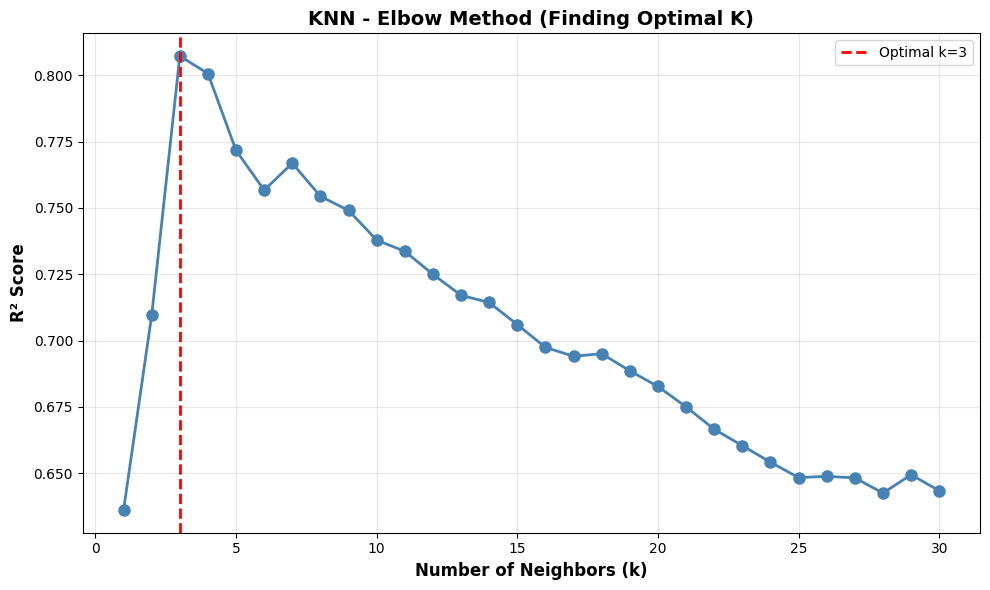


✓ Optimal k: 3 (R² = 0.8073)


In [136]:
print("\n--- Testing k from 1 to 30 ---")

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    k_scores.append(score)

    if k <= 15 or k % 5 == 0:  # Print selected values
        print(f"k={k:2d}: R² = {score:.4f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Neighbors (k)', fontweight='bold', fontsize=12)
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('KNN - Elbow Method (Finding Optimal K)', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axvline(x=k_range[k_scores.index(max(k_scores))], color='red',
            linestyle='--', linewidth=2, label=f'Optimal k={k_range[k_scores.index(max(k_scores))]}')
plt.legend()
plt.tight_layout()
plt.show()


optimal_k = k_range[k_scores.index(max(k_scores))]
optimal_score = max(k_scores)
print(f"\n✓ Optimal k: {optimal_k} (R² = {optimal_score:.4f})")

In [137]:
# Train with optimal k
print(f"Training KNN with optimal k={optimal_k}...")
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

Training KNN with optimal k=3...


KNeighborsRegressor(n_neighbors=3)

In [138]:
y_pred_optimal = knn_optimal.predict(X_test_scaled)


In [139]:
optimal_r2 = r2_score(y_test, y_pred_optimal)
optimal_mae = mean_absolute_error(y_test, y_pred_optimal)
optimal_rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimal))

print(f"--- Optimal KNN Performance (k={optimal_k}) ---")
print(f"R² Score: {optimal_r2:.4f}")
print(f"MAE: ${optimal_mae:.2f}k")
print(f"RMSE: ${optimal_rmse:.2f}k")


--- Optimal KNN Performance (k=3) ---
R² Score: 0.8073
MAE: $2.68k
RMSE: $3.76k


# STEP 10: CROSS-VALIDATION

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
cv_scores = cross_val_score(knn_optimal, X_train_scaled, y_train,
                             cv=5, scoring='r2', n_jobs=-1)

print(f"CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print(f"\n--- Comparison ---")
print(f"CV R² (5-fold): {cv_scores.mean():.4f}")
print(f"Test R²:        {optimal_r2:.4f}")
print(f"Difference:     {abs(cv_scores.mean() - optimal_r2):.4f}")

CV R² Scores: [0.80561749 0.66279316 0.72307482 0.85037259 0.70068238]
Mean CV R²: 0.7485 (+/- 0.0692)

--- Comparison ---
CV R² (5-fold): 0.7485
Test R²:        0.8073
Difference:     0.0588


# STEP 11: HYPERPARAMETER TUNING

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],  # distance gives closer neighbors more weight
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Power parameter for Minkowski metric
}

print("\nRunning GridSearchCV...")
print("Expected time: 30-60 seconds...")

grid_search_knn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid_knn,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_scaled, y_train)

print("\n--- Best Hyperparameters Found ---")
best_params = grid_search_knn.best_params_

for param, value in best_params.items():
    print(f"✓ {param}: {value}")

print(f"✓ Best CV R² Score: {grid_search_knn.best_score_:.4f}")


Running GridSearchCV...
Expected time: 30-60 seconds...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

--- Best Hyperparameters Found ---
✓ metric: manhattan
✓ n_neighbors: 3
✓ p: 1
✓ weights: distance
✓ Best CV R² Score: 0.7731


In [144]:
# Predict with best model
y_pred_tuned = grid_search_knn.best_estimator_.predict(X_test_scaled)

In [145]:
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned KNN Performance (Test Set) ---")
print(f"R² Score: {tuned_r2:.4f}")
print(f"MAE: ${tuned_mae:.2f}k")
print(f"RMSE: ${tuned_rmse:.2f}k")


--- Tuned KNN Performance (Test Set) ---
R² Score: 0.7278
MAE: $2.64k
RMSE: $4.47k


# STEP 12: IMPACT OF FEATURE SCALING

In [146]:
print("\n--- Experiment: KNN WITHOUT Feature Scaling ---")
print("⚠️  This will show why scaling is MANDATORY for KNN")

knn_unscaled = KNeighborsRegressor(n_neighbors=optimal_k)
knn_unscaled.fit(X_train, y_train)  # Unscaled data
y_pred_unscaled = knn_unscaled.predict(X_test)  # Unscaled data

unscaled_r2 = r2_score(y_test, y_pred_unscaled)
unscaled_mae = mean_absolute_error(y_test, y_pred_unscaled)

print(f"\n--- Results Comparison ---")
print(f"WITHOUT Scaling: R² = {unscaled_r2:.4f}, MAE = ${unscaled_mae:.2f}k")
print(f"WITH Scaling:    R² = {optimal_r2:.4f}, MAE = ${optimal_mae:.2f}k")

improvement = ((optimal_r2 - unscaled_r2) / abs(unscaled_r2)) * 100 if unscaled_r2 != 0 else 0
print(f"\n✓ Performance Improvement: {improvement:+.2f}%")

if improvement > 20:
    print("🔴 HUGE IMPACT! Scaling is CRITICAL for KNN!")
elif improvement > 5:
    print("✓ Significant improvement from scaling")
else:
    print("⚠️  Minor impact (unusual for KNN)")


--- Experiment: KNN WITHOUT Feature Scaling ---
⚠️  This will show why scaling is MANDATORY for KNN

--- Results Comparison ---
WITHOUT Scaling: R² = 0.5502, MAE = $3.75k
WITH Scaling:    R² = 0.8073, MAE = $2.68k

✓ Performance Improvement: +46.73%
🔴 HUGE IMPACT! Scaling is CRITICAL for KNN!


# STEP 13: IMPACT OF OUTLIERS

In [147]:
print("--- Experiment: KNN on Data WITH Outliers ---")

# Prepare original data (with outliers)
X_original = df_original.drop(['MEDV'], axis=1)
y_original = df_original['MEDV']

--- Experiment: KNN on Data WITH Outliers ---


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# Fill missing values in original data

print(f"Missing values in original data: {X_original.isnull().sum().sum()}")
X_original = X_original.fillna(X_original.median(numeric_only=True))
print(f"Missing Value filled :) : {X_original.isnull().sum().sum()}")

Missing values in original data: 120
Missing Value filled :) : 0


In [150]:
# Handle any infinite values from outlier detection

X_original = X_original.replace([np.inf, -np.inf], np.nan)
X_original = X_original.fillna(X_original.median())
print("Infinited Values Are Handled")

Infinited Values Are Handled


In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, random_state=42, test_size=0.2)

In [153]:
# scale original data

scaler_org = StandardScaler()
X_train_orig_scaler = scaler_org.fit_transform(X_train_orig)
X_test_orig_scaler = scaler_org.transform(X_test_orig)

In [154]:
# Train KNN on original data

knn_with_outliers = KNeighborsRegressor(n_neighbors=optimal_k)
knn_with_outliers.fit(X_train_orig_scaler, y_train_orig)

KNeighborsRegressor(n_neighbors=3)

In [155]:
# prediction

y_pred_with_outliers = knn_with_outliers.predict(X_test_orig_scaler)

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
# Evaluation

outliers_r2 = r2_score(y_test_orig, y_pred_with_outliers)
outliers_mse = mean_squared_error(y_test_orig, y_pred_with_outliers)
outliers_mae = mean_absolute_error(y_test_orig, y_pred_with_outliers)
outliers_rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_with_outliers))

print(f"outliers r2: {outliers_r2}")
print(f"outliers MSE: {outliers_mse}")
print(f"outliers MAE: {outliers_mae}")
print(f"Outliers RMSE: {outliers_rmse}")


print(f"\n--- Results Comparison ---")
print(f"WITH Outliers:    R² = {outliers_r2:.4f}")
print(f"WITHOUT Outliers: R² = {optimal_r2:.4f}")
print(f"Improvement: {((optimal_r2 - outliers_r2) / abs(outliers_r2) * 100):+.2f}%")

outliers r2: 0.7393221575254746
outliers MSE: 19.11649237472767
outliers MAE: 2.680392156862745
Outliers RMSE: 4.3722411158040755

--- Results Comparison ---
WITH Outliers:    R² = 0.7393
WITHOUT Outliers: R² = 0.8073
Improvement: +9.20%


# STEP 14: DISTANCE METRIC COMPARISON

In [158]:
metrics = {
    'Euclidean': 'euclidean',
    'Manhattan': 'manhattan',
    'Minkowski (p=1)': 'minkowski',
    'Minkowski (p=2)': 'minkowski'
}

metric_results = []

print("\n--- Testing Different Distance Metrics ---")

for name, metric in metrics.items():
    if 'Minkowski' in name:
        p = 1 if 'p=1' in name else 2
        knn_metric = KNeighborsRegressor(n_neighbors=optimal_k, metric=metric, p=p)
    else:
        knn_metric = KNeighborsRegressor(n_neighbors=optimal_k, metric=metric)

    knn_metric.fit(X_train_scaled, y_train)
    score = knn_metric.score(X_test_scaled, y_test)
    metric_results.append({'Metric': name, 'R² Score': score})
    print(f"{name:20s}: R² = {score:.4f}")


--- Testing Different Distance Metrics ---
Euclidean           : R² = 0.8073
Manhattan           : R² = 0.7248
Minkowski (p=1)     : R² = 0.7248
Minkowski (p=2)     : R² = 0.8073


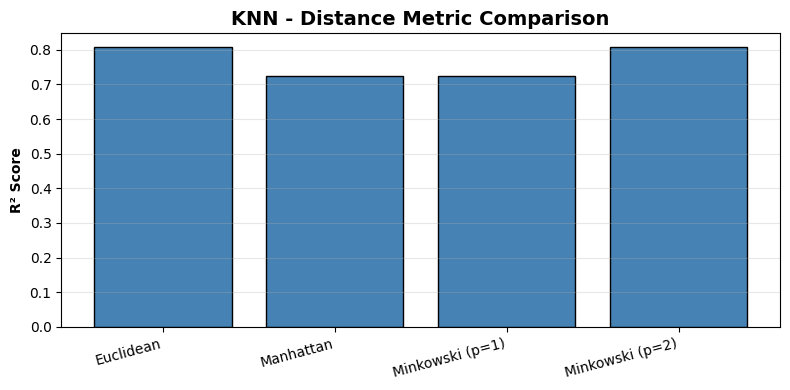


✓ Best Metric: Euclidean (R² = 0.8073)


In [161]:
# Visualize
metric_df = pd.DataFrame(metric_results)
plt.figure(figsize=(8, 4))
plt.bar(metric_df['Metric'], metric_df['R² Score'],
        color='steelblue', edgecolor='black')
plt.ylabel('R² Score', fontweight='bold')
plt.title('KNN - Distance Metric Comparison', fontweight='bold', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

best_metric_idx = metric_df['R² Score'].idxmax()
print(f"\n✓ Best Metric: {metric_df.loc[best_metric_idx, 'Metric']} (R² = {metric_df.loc[best_metric_idx, 'R² Score']:.4f})")


# STEP 15: MODEL COMPARISON

In [162]:
comparison = pd.DataFrame({
    'Model': [
        'KNN (Default k=5)',
        f'KNN (Optimal k={optimal_k})',
        'KNN (Tuned)',
        'KNN (No Scaling)'
    ],
    'R² Score': [
        default_r2,
        optimal_r2,
        tuned_r2,
        unscaled_r2
    ],
    'MAE ($k)': [
        default_mae,
        optimal_mae,
        tuned_mae,
        unscaled_mae
    ],
    'RMSE ($k)': [
        default_rmse,
        optimal_rmse,
        tuned_rmse,
        np.sqrt(mean_squared_error(y_test, y_pred_unscaled))
    ]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R² Score'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best R² Score: {comparison.loc[best_idx, 'R² Score']:.4f}")

improvement = ((tuned_r2 - default_r2) / default_r2) * 100
print(f"✓ Improvement from tuning: {improvement:.2f}%")



            Model  R² Score  MAE ($k)  RMSE ($k)
KNN (Default k=5)  0.771703  2.631569   4.091682
KNN (Optimal k=3)  0.807314  2.683333   3.759043
      KNN (Tuned)  0.727784  2.635417   4.467960
 KNN (No Scaling)  0.550202  3.752288   5.743294

✓ Best Model: KNN (Optimal k=3)
✓ Best R² Score: 0.8073
✓ Improvement from tuning: -5.69%


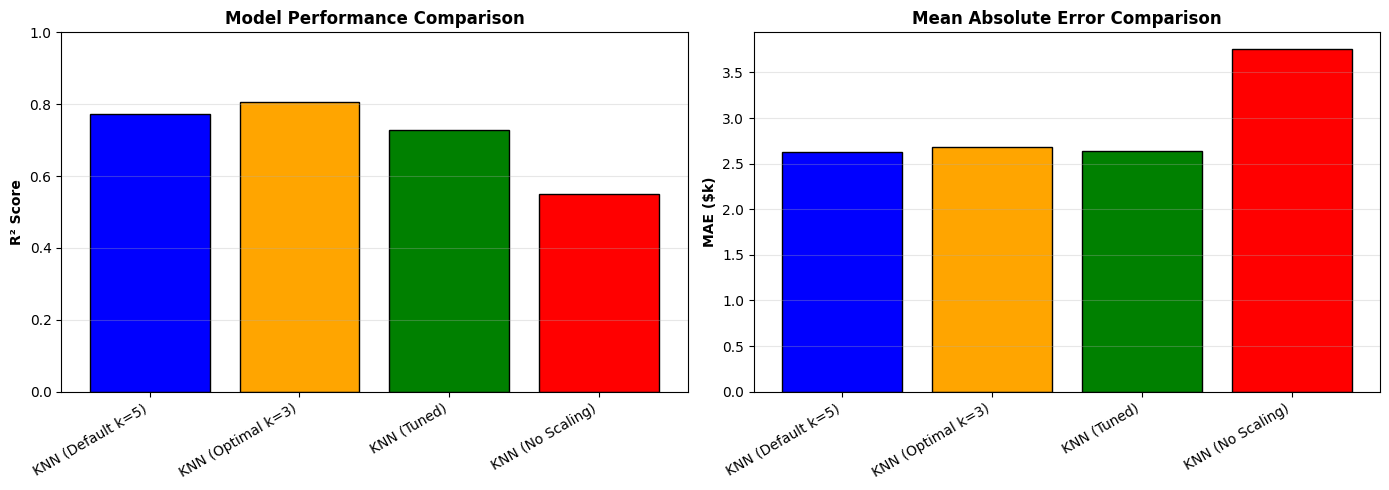

In [163]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score
axes[0].bar(range(len(comparison)), comparison['R² Score'],
            color=['blue', 'orange', 'green', 'red'],
            edgecolor='black')
axes[0].set_xticks(range(len(comparison)))
axes[0].set_xticklabels(comparison['Model'], rotation=30, ha='right')
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# MAE
axes[1].bar(range(len(comparison)), comparison['MAE ($k)'],
            color=['blue', 'orange', 'green', 'red'],
            edgecolor='black')
axes[1].set_xticks(range(len(comparison)))
axes[1].set_xticklabels(comparison['Model'], rotation=30, ha='right')
axes[1].set_ylabel('MAE ($k)', fontweight='bold')
axes[1].set_title('Mean Absolute Error Comparison', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# STEP 16: COMPARISON WITH ALL ALGORITHMS



        Algorithm  R² Score Category
          XGBoost  0.930000 Ensemble
    Random Forest  0.900000 Ensemble
    Decision Tree  0.820000     Tree
    KNN (Optimal)  0.807314 Distance
Linear Regression  0.740000   Linear
 Ridge Regression  0.730000   Linear
 Lasso Regression  0.720000   Linear


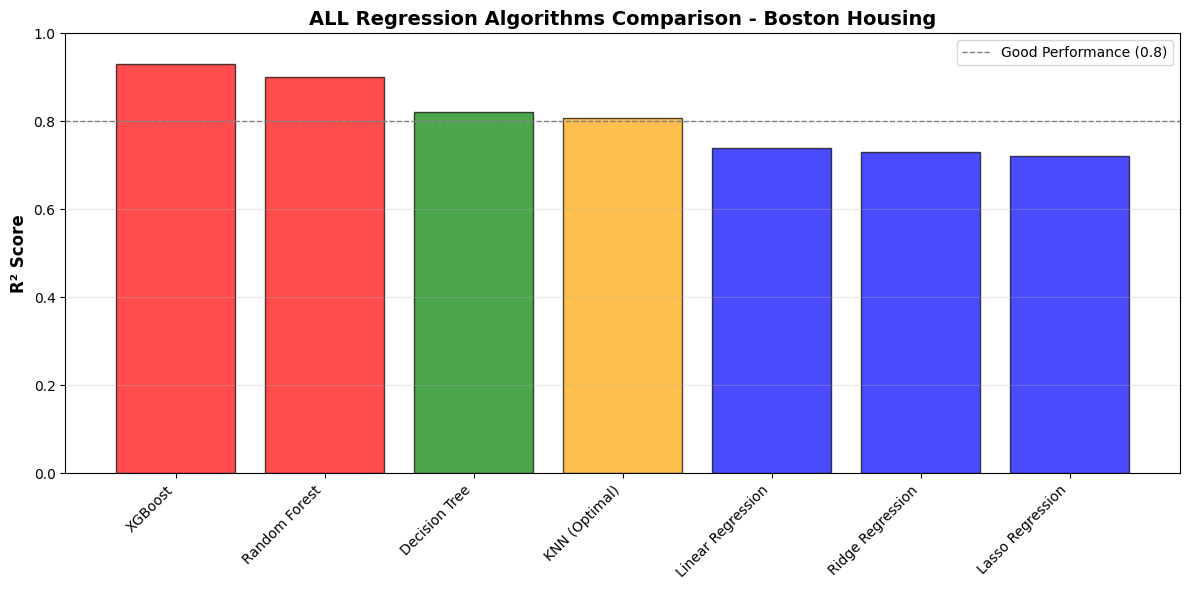


--- Ranking ---
1. XGBoost                   R² = 0.9300 (Ensemble)
2. Random Forest             R² = 0.9000 (Ensemble)
3. Decision Tree             R² = 0.8200 (Tree)
4. KNN (Optimal)             R² = 0.8073 (Distance)
5. Linear Regression         R² = 0.7400 (Linear)
6. Ridge Regression          R² = 0.7300 (Linear)
7. Lasso Regression          R² = 0.7200 (Linear)


In [165]:
# Add your previous results
all_models_comparison = pd.DataFrame({
    'Algorithm': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree',
        'KNN (Optimal)',
        'Random Forest',
        'XGBoost'
    ],
    'R² Score': [
        0.74,  # Your Linear Reg result
        0.73,  # Your Ridge result
        0.72,  # Your Lasso result
        0.82,  # Your Decision Tree result
        optimal_r2,  # Current KNN result
        0.90,  # Your RF result
        0.93   # Your XGBoost result
    ],
    'Category': [
        'Linear',
        'Linear',
        'Linear',
        'Tree',
        'Distance',
        'Ensemble',
        'Ensemble'
    ]
})

all_models_comparison = all_models_comparison.sort_values('R² Score', ascending=False)

print("\n")
print(all_models_comparison.to_string(index=False))

# Visualize all algorithms
plt.figure(figsize=(12, 6))
colors = {'Linear': 'blue', 'Tree': 'green', 'Distance': 'orange', 'Ensemble': 'red'}
bar_colors = [colors[cat] for cat in all_models_comparison['Category']]

plt.bar(all_models_comparison['Algorithm'], all_models_comparison['R² Score'],
        color=bar_colors, edgecolor='black', alpha=0.7)
plt.axhline(y=0.8, color='gray', linestyle='--', linewidth=1, label='Good Performance (0.8)')
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('ALL Regression Algorithms Comparison - Boston Housing',
          fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n--- Ranking ---")
for idx, row in all_models_comparison.iterrows():
    rank = all_models_comparison.index.tolist().index(idx) + 1
    print(f"{rank}. {row['Algorithm']:25s} R² = {row['R² Score']:.4f} ({row['Category']})")


# STEP 17: VISUALIZATIONS

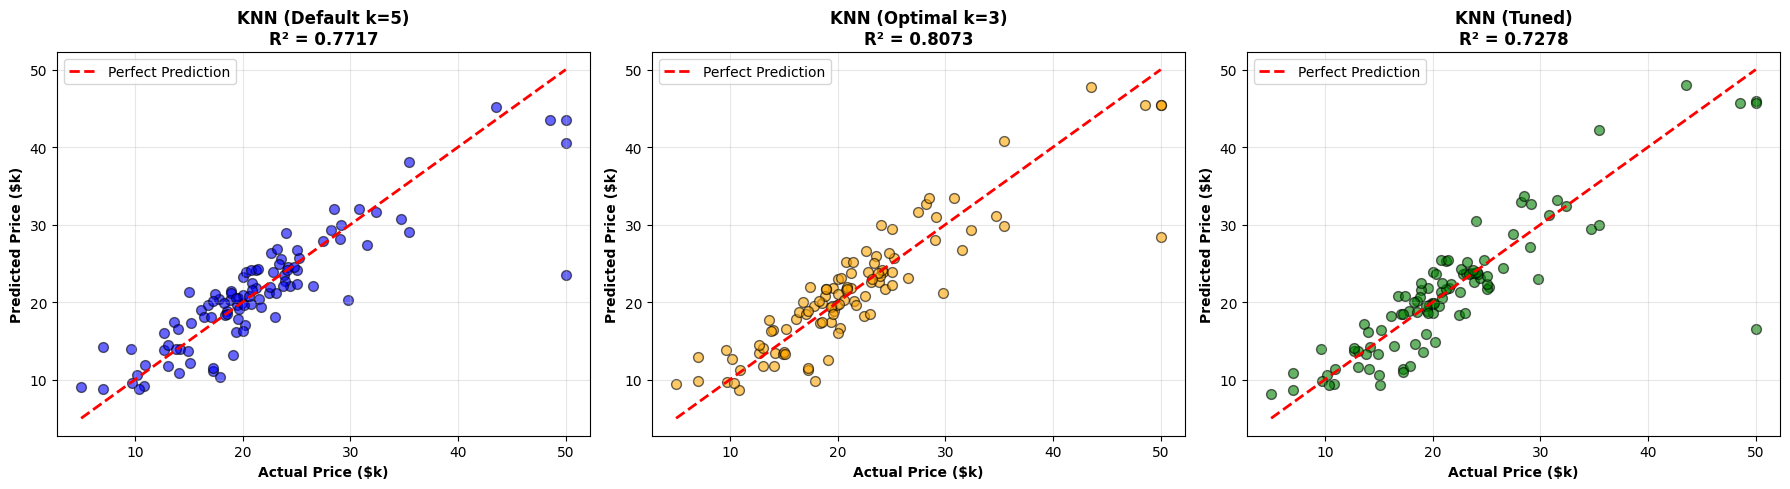

In [167]:
# 17.1: Actual vs Predicted
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Default model
axes[0].scatter(y_test, y_pred_default, alpha=0.6, s=50, color='blue', edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[0].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[0].set_title(f'KNN (Default k=5)\nR² = {default_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Optimal k model
axes[1].scatter(y_test, y_pred_optimal, alpha=0.6, s=50, color='orange', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[1].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[1].set_title(f'KNN (Optimal k={optimal_k})\nR² = {optimal_r2:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Tuned model
axes[2].scatter(y_test, y_pred_tuned, alpha=0.6, s=50, color='green', edgecolor='black')
axes[2].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[2].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[2].set_title(f'KNN (Tuned)\nR² = {tuned_r2:.4f}', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

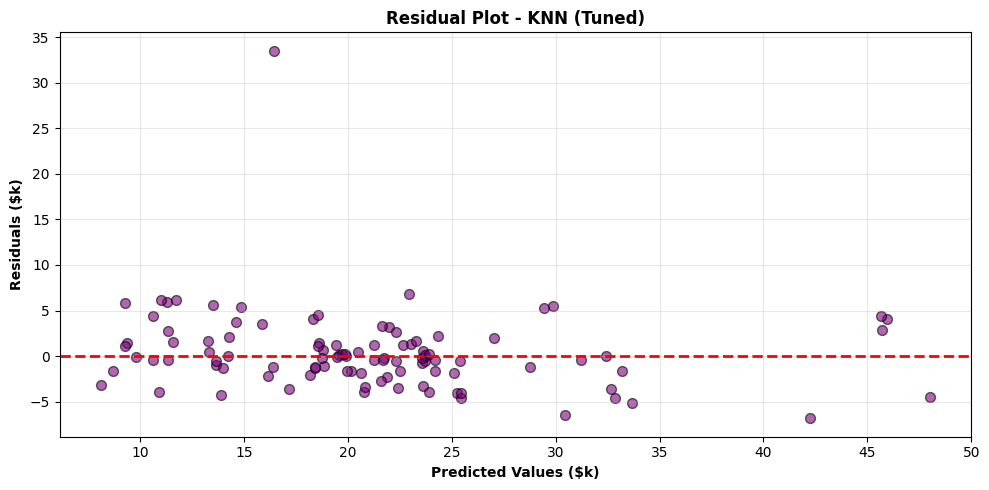

In [168]:
# 17.2: Residual Plot
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_tuned, residuals, alpha=0.6, s=50, color='purple', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values ($k)', fontweight='bold')
plt.ylabel('Residuals ($k)', fontweight='bold')
plt.title('Residual Plot - KNN (Tuned)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# residual plot would show the difference more clearly

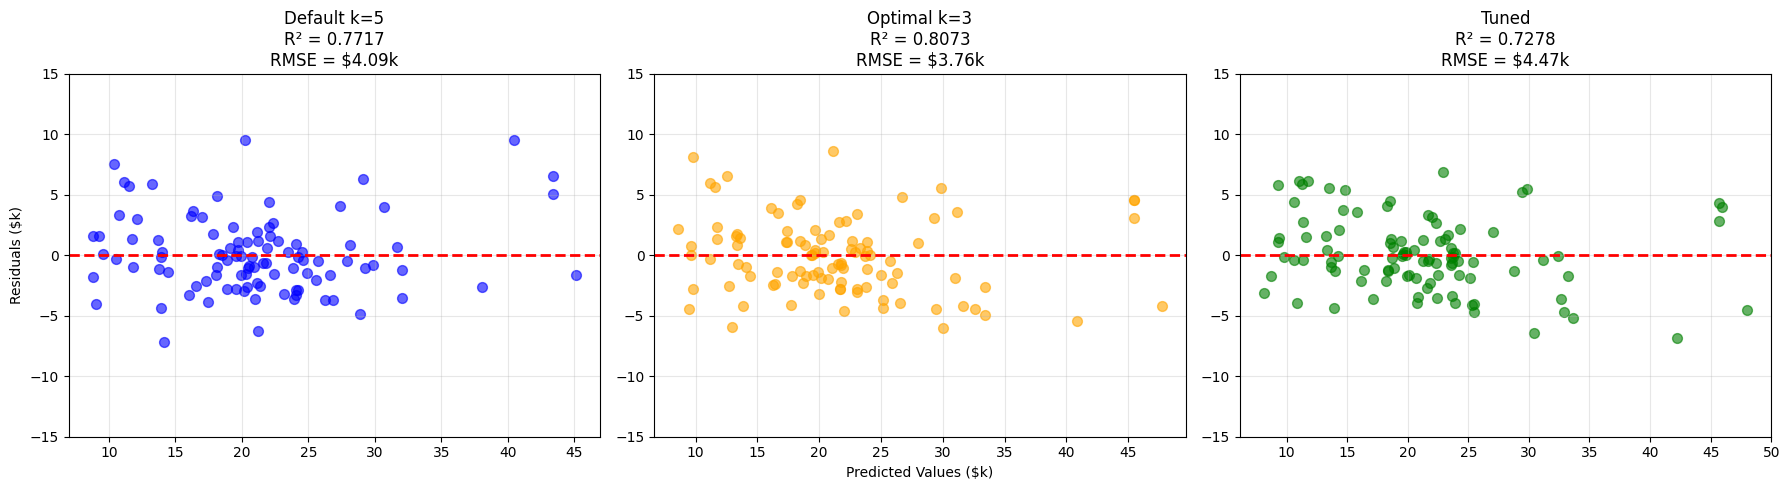

In [169]:
# Calculate residuals for each model
residuals_default = y_test - y_pred_default
residuals_optimal = y_test - y_pred_optimal
residuals_tuned = y_test - y_pred_tuned

# Plot residuals comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Default
axes[0].scatter(y_pred_default, residuals_default, alpha=0.6, s=50, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0].set_title(f'Default k=5\nR² = {default_r2:.4f}\nRMSE = ${default_rmse:.2f}k')
axes[0].set_ylabel('Residuals ($k)')
axes[0].set_ylim([-15, 15])
axes[0].grid(True, alpha=0.3)

# Optimal
axes[1].scatter(y_pred_optimal, residuals_optimal, alpha=0.6, s=50, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1].set_title(f'Optimal k=3\nR² = {optimal_r2:.4f}\nRMSE = ${optimal_rmse:.2f}k')
axes[1].set_xlabel('Predicted Values ($k)')
axes[1].set_ylim([-15, 15])
axes[1].grid(True, alpha=0.3)

# Tuned
axes[2].scatter(y_pred_tuned, residuals_tuned, alpha=0.6, s=50, color='green')
axes[2].axhline(y=0, color='red', linestyle='--', lw=2)
axes[2].set_title(f'Tuned\nR² = {tuned_r2:.4f}\nRMSE = ${tuned_rmse:.2f}k')
axes[2].set_ylim([-15, 15])
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
